# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [22]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(8)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1
5,Diego,60,Engenheiro,15000,2000,1,Solteiro,1
6,Denize,22,Estudante,1200,500,0,Solteiro,0
7,Claudio,24,Estudante,1500,250,1,Solteiro,0


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

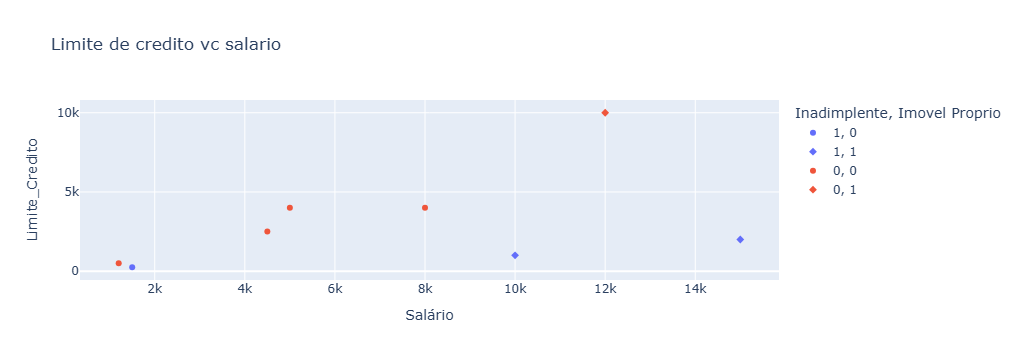

In [40]:
df_ordenado = df.sort_values(by='Limite_Credito')

fig1 = px.scatter(
    df_ordenado,
    x= 'Salário',
    y= 'Limite_Credito',
    color= 'Historico_Inadimplencia',
    symbol= 'Imovel_Proprio',
    title= 'Limite de credito vc salario',
    labels= {'Historico_Inadimplencia': 'Inadimplente', 'Imovel_Proprio': 'Imovel Proprio'}
)
fig1.show()

Ultilizei o scatter plot para poder visualizar padrões e possíveis correlações  entre a relação de salário e limete de credito, com 
inadimplentes e pessoas com imoveis. Assim podemos ver que apenas uma das 3 pessoas pessoa que tem imovel não é inadimplente,
e apenas 1 pessoa das 5 que não tem imovel e inadimplente.

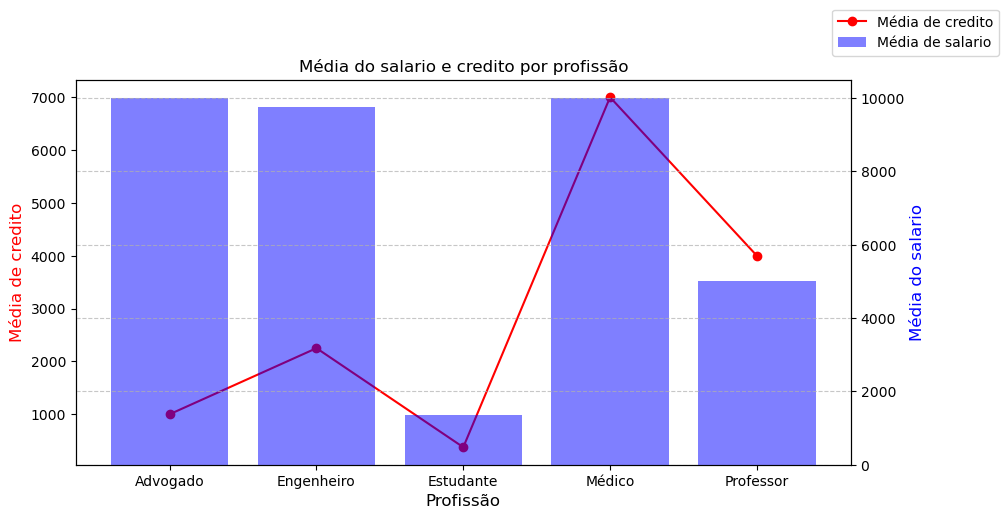

In [36]:
df['Salário'] = pd.to_numeric(df['Salário'], errors='coerce')
df['Limite_Credito'] = pd.to_numeric(df['Limite_Credito'], errors='coerce')

media_salario_profissao = df.groupby('Profissão')['Salário'].mean()
media_limite_credito_profissao = df.groupby('Profissão')['Limite_Credito'].mean()

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(media_limite_credito_profissao.index, media_limite_credito_profissao, marker='o', color='red', label='Média de credito')
ax1.set_xlabel('Profissão', fontsize=12)
ax1.set_ylabel('Média de credito', color='red', fontsize=12)

ax2 = ax1.twinx()
ax2.bar(media_salario_profissao.index, media_salario_profissao, color='blue', alpha=0.5, label='Média de salario')
ax2.set_ylabel('Média do salario', color='blue', fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', bbox_to_anchor=(1.2, 1.2))

plt.title('Média do salario e credito por profissão', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Usei o gráfico de linhas e colunas para poder ver se os maiores salários teria o maior limite de credito, e podemos ver que apenas uma
profissão tem a maior média de salário e credito.

C:\Users\joaoz\AppData\Local\Temp\ipykernel_24112\1148794655.py:4: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



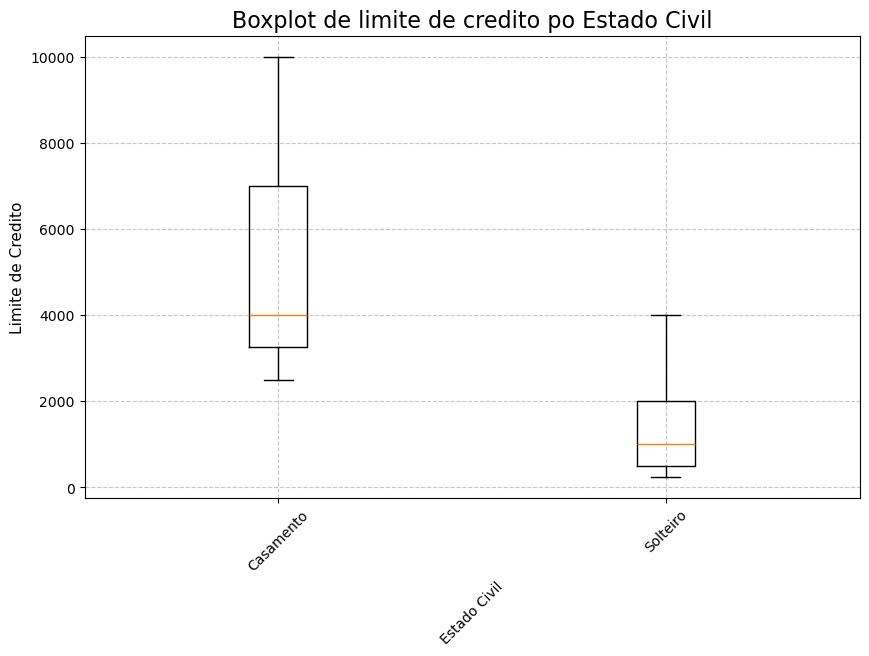

In [37]:
df['Limite_Credito'] = pd.to_numeric(df['Limite_Credito'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Estado_Civil'] == civil]['Limite_Credito'] for civil in df['Estado_Civil'].unique()],
            labels=df['Estado_Civil'].unique())

plt.title('Boxplot de limite de credito po Estado Civil', fontsize=16)
plt.ylabel('Limite de Credito', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Estado Civil', rotation=45)
plt.xticks(rotation=45)
plt.show()

usei o boxplot para ver se o estado civil tem relação com o limite de credito, e podemos ver que as pessoas casadas tende a ter
o maior limite de credito que os solteiros.